# Radiation Transport Development
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  09/29/2023          |
| Updated |  10/05/2023          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Velocity $v_0 = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{p})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{p})$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} \equiv \mathcal{C} \equiv c/v_0$
  - $\mathbb{P} \equiv \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$


## Stellar Surface

### Total surface emission
![Total surface emission](stellar_surface/nzeta1/tot_surf/figs/slice.png)

### Emission only at $\theta=\pi/2$
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta1/theta0.5pi/figs/slice.png)

### Most-radial emission only at $\theta=\pi/2$

```
nzeta       = 5                   # number of polar angles (0 to pi/2)
npsi        = 2                   # number of azimuthal angles (0 to pi)
```
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta5/theta0.5pi_radial/figs/slice.old.png)

### Most-radial emission only at $\theta=\pi/2$

```
nzeta       = 5                   # number of polar angles (0 to pi/2)
npsi        = 2                   # number of azimuthal angles (0 to pi)
```
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta5/theta0.5pi_radial/figs/slice.png)

### Most-radial emission only at $\theta=\pi/2$

```
nzeta       = 6                   # number of polar angles (0 to pi/2)
npsi        = 4                   # number of azimuthal angles (0 to pi)
```
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta6-npsi4/theta0.5pi_radial/figs/slice.old.png)

### Most-radial emission only at $\theta=\pi/2$

```
nzeta       = 6                   # number of polar angles (0 to pi/2)
npsi        = 4                   # number of azimuthal angles (0 to pi)
```
![Emission only at $\theta=\pi/2$](stellar_surface/nzeta6-npsi4/theta0.5pi_radial/figs/slice.png)

## Appendix

### Single Beam (`gid == 0`)

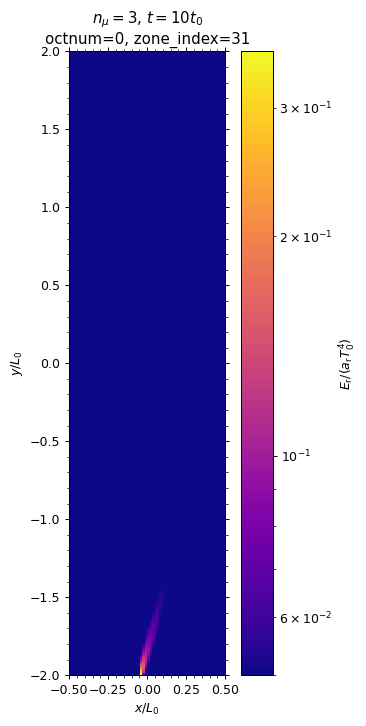

In [3]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam_gid0'
offset = 0.1
vmin, vmax = 0.05, 2
fig, ax = plt.subplots(figsize=(4.68, 9), dpi=90)

# Read and plot
path = f'{wd}'
athinput = athena_read.athinput(f'{path}/athinput.beam_gid0')
pid = athinput['job']['problem_id']
nmu = athinput['radiation']['nmu']
octnum = athinput['problem']['octnum']
zone_index = athinput['problem']['zone_index']
athdf = athena_read.athdf(f'{path}/athdf/{pid}.out1.00001.athdf')
t = athdf['Time']
clip = np.clip(athdf['Er'][0], vmin, vmax)
Er = ax.pcolormesh(athdf['x1v'], athdf['x2v'], clip, cmap='plasma',
                   norm=colors.LogNorm())

# Format (sub)plots
cb_Er = plt.colorbar(Er, label='$E_\mathrm{r}/(a_\mathrm{r}T_0^4)$')
ax.minorticks_on()
ax.set_title(f'$n_\mu={nmu}$, $t={t:.0f}t_0$\noctnum={octnum}, zone_index={zone_index}')
ax.set(aspect='equal', xlabel='$x/L_0$', ylabel='$y/L_0$')
ax.tick_params(axis='both', which='both', top=True, right=True)

### Rotated single Beam (`gid == 0`)
- Try fixing for-loop indices in `TwoBeamHydro()`